# Interpreting the Learning Curves

The part of the data that can help the model make descisions is the *signal*.

*Noise* is the part that is only true to the training data.

<br/>

The *validation* and *training* data can be plotted to form the *learning curves*.

Interpreting the learning curves will help us train the model effectively.

<br/>

The training curve will go down when it learns *both* signal or noise.

However, the validation data will *only* go down when it learns signal.

When the model learns noise, a *gap* is created in the curves.

The size of the gap tells how much noise the model has learned.

<br/>

We can never practically create a model that only learns signal.

The model will learn noise, but the validation curve can still go down.

Once the validation curve comes up, the model has learned too much noise.

<br/>

The trade-off between learning signal for more noise means that 2 things can go wrong: 1) not enough signal or 2) too much noise.

*Underfitting* occurs when the model hasn't learned enough *signal*. It can be deceptive as it seems the validation curve matches perfectly to the training curve. Enlarge the capacity to see if this is the case.

*Overfitting* occurs when the model has learned too much *noise*. The validation curve will show a gap early on in the training and keep increasing while the training curve continues to decrease.

Both problems occur when the loss isn't as low as it should be.

# Capacity

A model's *capacity* refers to the size and complexity of the patterns it is able to learn.

For neural networks, this is determined by how many neurons it has and how they are concnected together.

If the model is *underfitting* the data, try increasing its capacity.

<br/>

There are 2 ways to increase a model's capacity: 1) making it wider (adding more units to a layer) or 2) deeper (adding more layers).

*Widder* networks can learn *linear* relationships more easily.

*Deeper* networks can learn *non-linear* relationships more easily.

# Early Stopping

Interrupting the training when the validation loss isn't decreasing is called *early stopping* (kind of like a checkpoint).

If the validation loss starts to rise, the weights can be reset back to when the validation loss was at its minimum (the early stopping point).

<br/>

Early stopping can help ensure the model doesn't train for too long (overfitting) or too short (underfitting).

In [4]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# early stopping is implemented in Keras through a callback

early_stopping = EarlyStopping(
    min_delta=0.001, # min amount of change that counts as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True # reverts back to weights with lowest validation loss
)

# the callback gets passed into the fit() method

In [7]:
# implementing a neural network with larger capacity and early stopping

# data prep
red_wine_data = pd.read_csv('./red-wine.csv')

# create data splits
df_train = red_wine_data.sample(frac=0.7, random_state=0)
df_valid = red_wine_data.drop(df_train.index)

# normalize data
min_ = df_train.min(axis=0)
max_ = df_train.max(axis=0)
df_train_normal = (df_train - min_) / (max_ - min_)
df_valid_normal = (df_valid - min_) / (max_ - min_)

# create features/target splits
X_train = df_train_normal.drop('quality', axis=1)
X_valid = df_valid_normal.drop('quality', axis=1)
y_train = df_train_normal['quality']
y_valid = df_valid_normal['quality']

In [13]:
# creating the early stopping callback
early_stopping = EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

# getting the features size
features_size = [df_train_normal.shape[1] - 1]

# building the model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=features_size),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

# setting the optimizer and loss function
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

Minimum validation loss: 0.09237061440944672


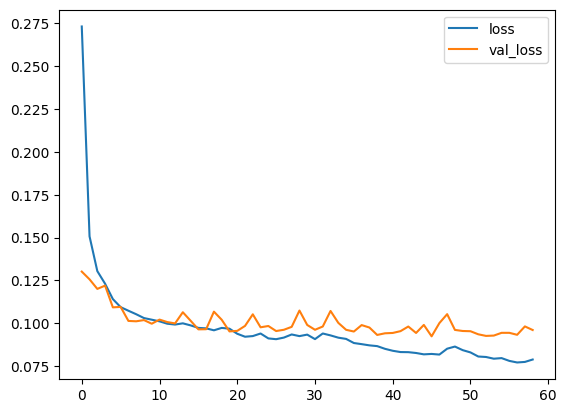

In [14]:
# fitting the model
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs = 500,
    callbacks = [early_stopping], # put callbacks in a list
    verbose = 0 # turn off the training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(f"Minimum validation loss: {history_df['val_loss'].min()}")